## Analyse des Correspondances Multiples

On importe la librairie pandas pour charger les données (races canines), ainsi que la classe MCA du package fanalysis.

In [9]:
import pandas as pd
import numpy as np
from fanalysis.mca import MCA
import matplotlib.pyplot as plt

In [2]:
df = pd.read_table("data/ex_acm.txt", header=0, index_col=0)
df

Mode    Type     Ancien       Eloign     Superf
1       NR1   Autre        NR3  plus_5km_NR   plus_30m
2       NR1   Autre        NR3     de_1_5km        NR5
3       NR1   Autre        NR3  plus_5km_NR        NR5
4       NR1   Autre        NR3  plus_5km_NR        NR5
5       NR1   Autre        NR3  plus_5km_NR        NR5
..      ...     ...        ...          ...        ...
379    Seul  Appart        NR3  plus_5km_NR  de_10_20m
380  Couple   Autre  de_1_3ans     de_1_5km   plus_30m
381    Seul     NR2  plus_3ans  plus_5km_NR  moins_10m
382   Coloc     NR2  moins_1an     de_1_5km   plus_30m
383     NR1   Autre  de_1_3ans  plus_5km_NR        NR5

[383 rows x 5 columns]

In [3]:
X = df.values

On crée une instance de la classe MCA, en lui passant ici des étiquettes pour les lignes et les variables. Ces paramètres sont facultatifs ; en leur absence, le programme détermine automatiquement des étiquettes.

In [4]:
my_mca = MCA(row_labels=df.index.values, var_labels=df.columns.values)

On estime le modèle en appliquant la méthode fit de la classe MCA sur le jeu de données.

In [5]:
my_mca.fit(X)

MCA(row_labels=array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109,...
       313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
       339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
       365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377,
       378, 37

L'exécution de la méthode my_mca.fit(X) provoque a minima le calcul des attributs :

* my_pca.eig_ : valeurs propres
* my_pca.row_coord_ : coordonnées des points lignes
* my_pca.col_coord_ : coordonnées des points colonnes

### 1. Analyse des valeurs propres

L'attribut my_mca.eig_ contient :

* en 1ère ligne : les valeurs propres en valeur absolue
* en 2ème ligne : les valeurs propres en pourcentage de la variance totale
* en 3ème ligne : les valeurs propres en pourcentage cumulé de la variance totale

In [6]:
print(my_mca.eig_)

[[7.21527891e-01 4.03288606e-01 3.28844287e-01 2.51904524e-01
  2.36094369e-01 2.10495696e-01 1.98499515e-01 1.86482543e-01
  1.70800409e-01 1.66764927e-01 1.23982984e-01 1.10424187e-01
  1.04249432e-01 7.46917156e-02 5.53192193e-02 3.84513821e-02
  1.81783147e-02]
 [2.12214086e+01 1.18614296e+01 9.67189078e+00 7.40895658e+00
  6.94395204e+00 6.19104988e+00 5.83822102e+00 5.48478067e+00
  5.02354146e+00 4.90485078e+00 3.64655834e+00 3.24777020e+00
  3.06615976e+00 2.19681516e+00 1.62703586e+00 1.13092300e+00
  5.34656315e-01]
 [2.12214086e+01 3.30828381e+01 4.27547289e+01 5.01636855e+01
  5.71076375e+01 6.32986874e+01 6.91369084e+01 7.46216891e+01
  7.96452306e+01 8.45500814e+01 8.81966397e+01 9.14444099e+01
  9.45105697e+01 9.67073848e+01 9.83344207e+01 9.94653437e+01
  1.00000000e+02]]


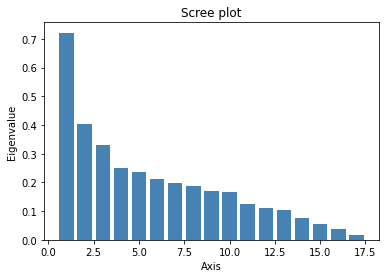

In [7]:
my_mca.plot_eigenvalues()

### Selection des facteurs pertinents 

Un seuil de sélection possible : on sélectionne les facteurs dont les v.p. sont supérieures à la moyenne des v.p.

In [11]:
print("La moyenne des valeurs propres : \n", np.average(my_mca.eig_[0]))
print("La moyenne des valeurs propres est aussi égale à 1/p : \n", 1/5)
print("On retient donc 6 facteurs")

La moyenne des valeurs propres : 
 0.20000000000000007
La moyenne des valeurs propres est aussi égale à 1/p : 
 0.2
On retient donc 6 facteurs


On refait le calcul en gardant uniquement 4 facteurs

In [12]:
#Instanciation
my_mca = MCA(row_labels=df.index.values, var_labels=df.columns.values[:],n_components=6)
#Calcul
my_mca.fit(X)

MCA(n_components=6,
    row_labels=array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 1...
       313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
       339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
       365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377,
       378, 

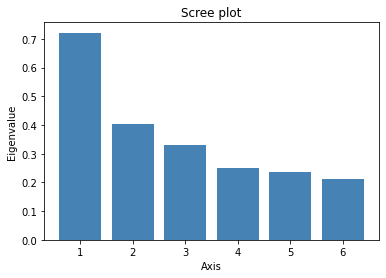

In [13]:
my_mca.plot_eigenvalues()

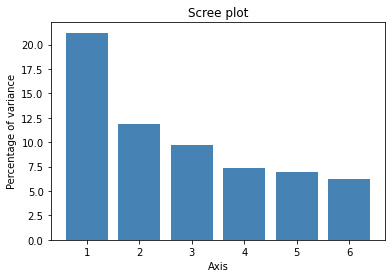

In [14]:
my_mca.plot_eigenvalues(type="percentage")

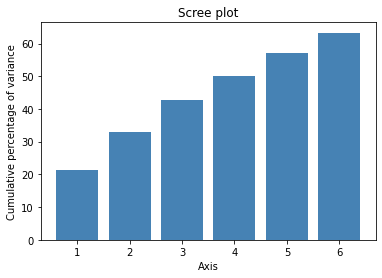

In [15]:
my_mca.plot_eigenvalues(type="cumulative")

Lors de l'exécution de la méthode my_mca.fit(X), les statistiques suivantes ont été calculées :

* my_mca.row_contrib_ : contributions des points lignes à la variance de l'axe
* my_mca.col_contrib_ : contributions des points colonnes à la variance de l'axe
* my_mca.row_cos2_ : cosinus carrés des points lignes
* my_mca.col_cos2_ : cosinus carrés des points colonnes

### 2. Extraction des statistiques sur les points lignes

In [16]:
df_rows = my_mca.row_topandas()
print(df_rows)

     row_coord_dim1  row_coord_dim2  row_coord_dim3  row_coord_dim4  \
1         -1.493799        0.007911       -0.049346       -0.163453   
2         -1.529649       -0.425435        0.178491       -0.091262   
3         -1.865093       -0.500662        0.280889       -0.324673   
4         -1.865093       -0.500662        0.280889       -0.324673   
5         -1.865093       -0.500662        0.280889       -0.324673   
..              ...             ...             ...             ...   
379       -0.284472       -0.201026        0.217113        0.317539   
380       -0.257295        0.672886       -0.344194       -0.015555   
381       -0.042455       -0.796109       -0.406274       -0.339250   
382       -0.056545        0.140053       -0.404866        1.253375   
383       -1.390965       -0.400417        0.208550       -0.065104   

     row_coord_dim5  row_coord_dim6  row_contrib_dim1  row_contrib_dim2  \
1          0.408963        0.231824          0.807482          0.000041 

In [17]:
# Coordonnées des points lignes
print(my_mca.row_coord_)

[[-1.49379936  0.00791127 -0.04934614 -0.16345283  0.40896298  0.23182431]
 [-1.52964938 -0.42543508  0.17849081 -0.09126195  0.30221353 -0.27451192]
 [-1.86509316 -0.50066206  0.28088948 -0.32467312 -0.08353638 -0.0777242 ]
 ...
 [-0.04245452 -0.79610858 -0.40627416 -0.33925047 -1.55713495 -0.42444451]
 [-0.05654538  0.14005282 -0.40486623  1.25337497 -1.13651549  0.05603411]
 [-1.39096481 -0.40041699  0.2085497  -0.06510406 -0.09835356 -0.59948495]]


In [18]:
# Contributions des points lignes
print(my_mca.row_contrib_)

[[8.07481606e-01 4.05208130e-05 1.93338072e-03 2.76917335e-02
  1.84962458e-01 6.66616333e-02]
 [8.46704546e-01 1.17179563e-01 2.52954633e-02 8.63266169e-03
  1.01005125e-01 9.34717626e-02]
 [1.25877806e+00 1.62283602e-01 6.26443440e-02 1.09259177e-01
  7.71732736e-03 7.49325587e-03]
 ...
 [6.52222853e-04 4.10326796e-01 1.31053714e-01 1.19290589e-01
  2.68144011e+00 2.23460029e-01]
 [1.15702417e-03 1.26989842e-02 1.30146959e-01 1.62827328e+00
  1.42845419e+00 3.89460088e-03]
 [7.00132742e-01 1.03803086e-01 3.45326622e-02 4.39320469e-03
  1.06978311e-02 4.45773843e-01]]


In [19]:
# Cos2 des points lignes
print(my_mca.row_cos2_)

[[7.52038469e-01 2.10934878e-05 8.20657569e-04 9.00410199e-03
  5.63668173e-02 1.81122943e-02]
 [5.59036822e-01 4.32437379e-02 7.61181700e-03 1.98992215e-03
  2.18214919e-02 1.80044165e-02]
 [7.48871052e-01 5.39629081e-02 1.69854447e-02 2.26933520e-02
  1.50230222e-03 1.30052450e-03]
 ...
 [2.71383191e-04 9.54288390e-02 2.48526924e-02 1.73290981e-02
  3.65079579e-01 2.71254456e-02]
 [5.51622980e-04 3.38401071e-03 2.82794605e-02 2.71025441e-01
  2.22842870e-01 5.41692689e-04]
 [4.14320687e-01 3.43343891e-02 9.31372623e-03 9.07654388e-04
  2.07149779e-03 7.69592644e-02]]


### 3. Extraction des statistiques sur les points colonnes

In [20]:
df_cols = my_mca.col_topandas()
print(df_cols)

                    col_coord_dim1  col_coord_dim2  col_coord_dim3  \
Mode_Coloc                0.227522        1.020055       -0.786938   
Mode_Couple               0.221854        1.315454       -0.244849   
Mode_NR1                 -1.591385       -0.238838        0.099534   
Mode_Seul                 0.692055       -0.525114        0.240510   
Type_Appart               0.239038        1.043298       -0.358106   
Type_Autre               -1.584990       -0.132189        0.013677   
Type_Chamb                0.235812       -0.797643       -0.027961   
Type_Cite                 0.750465       -1.439496       -1.909820   
Type_NR2                 -0.920720       -0.872471        0.394205   
Type_Studio               0.717606       -0.155645        1.024909   
Ancien_NR3               -1.539340       -0.257937        0.082270   
Ancien_de_1_3ans          0.474350        0.060367       -0.125146   
Ancien_moins_1an          0.657026       -0.595829       -0.137548   
Ancien_plus_3ans    

In [21]:
# Coordonnées des points colonnes
print(my_mca.col_coord_)

[[ 0.22752162  1.02005499 -0.78693767  1.16919949 -0.50191657  0.18544642]
 [ 0.22185384  1.31545441 -0.24484922 -0.94199955 -0.51773219 -0.20102405]
 [-1.59138489 -0.23883822  0.09953421 -0.07601289  0.26306597  0.08437011]
 [ 0.69205528 -0.52511354  0.24051031 -0.04133173  0.148632   -0.04212226]
 [ 0.23903786  1.0432982  -0.35810583  0.11664394 -0.29975604  0.15143786]
 [-1.58499014 -0.13218877  0.0136767  -0.2343399   0.73648568  0.09301445]
 [ 0.23581161 -0.79764276 -0.02796146  1.08148622  0.67166914  1.68598864]
 [ 0.75046533 -1.43949602 -1.90981984 -0.6731231  -0.07998842 -0.27626091]
 [-0.92072032 -0.87247114  0.39420536  1.10713695 -3.03805616 -0.78264274]
 [ 0.71760551 -0.15564526  1.024909   -0.13064403  0.32853859 -0.27602615]
 [-1.53933965 -0.25793657  0.08227001 -0.04457239  0.16946887  0.11549575]
 [ 0.47434979  0.06036663 -0.12514602  0.60681734  0.13347088 -1.08141846]
 [ 0.65702602 -0.5958294  -0.13754846  0.3385278   0.017118    0.93824474]
 [ 0.48390885  0.61099369

In [22]:
# Contributions des points colonnes
print(my_mca.col_contrib_)

[[1.98563445e-01 7.14065925e+00 5.21191661e+00 1.50192539e+01
  2.95314330e+00 4.52168986e-01]
 [1.78107418e-01 1.12030655e+01 4.76001545e-01 9.19743339e+00
  2.96432585e+00 5.01249603e-01]
 [1.74121404e+01 7.01691989e-01 1.49454591e-01 1.13787191e-01
  1.45411432e+00 1.67760146e-01]
 [6.41255933e+00 6.60531334e+00 1.69933909e+00 6.55140152e-02
  9.03944929e-01 8.14297345e-02]
 [4.79699720e-01 1.63489618e+01 2.36222730e+00 3.27173120e-01
  2.30536384e+00 6.59955873e-01]
 [1.38179883e+01 1.71956251e-01 2.25744332e-03 8.65169718e-01
  9.11775240e+00 1.63118196e-01]
 [8.04893578e-02 1.64763924e+00 2.48308012e-03 4.84916798e+00
  1.99565921e+00 1.41035124e+01]
 [1.67117996e+00 1.10006934e+01 2.37470452e+01 3.85095193e+00
  5.80208014e-02 7.76266316e-01]
 [1.34975901e+00 2.16840347e+00 5.42886001e-01 5.59011354e+00
  4.49117387e+01 3.34301099e+00]
 [4.02506955e+00 3.38774589e-01 1.80150424e+01 3.82118588e-01
  2.57835151e+00 2.04132530e+00]
 [1.68063377e+01 8.44242439e-01 1.05329528e-01 4.0

In [23]:
# Cos2 des points colonnes
print(my_mca.col_cos2_)

[[8.31394720e-03 1.67112563e-01 9.94586585e-02 2.19552893e-01
  4.04599172e-02 5.52330250e-03]
 [7.39025930e-03 2.59822867e-01 9.00167250e-03 1.33237711e-01
  4.02472411e-02 6.06766795e-03]
 [8.35375195e-01 1.88164964e-02 3.26795338e-03 1.90592424e-03
  2.28276114e-02 2.34805522e-03]
 [4.47494918e-01 2.57639806e-01 5.40472916e-02 1.59615026e-03
  2.06410217e-02 1.65779119e-03]
 [2.48244769e-02 4.72893829e-01 5.57146623e-02 5.91113802e-03
  3.90375564e-02 9.96358511e-03]
 [6.21911156e-01 4.32577895e-03 4.63060310e-05 1.35946390e-02
  1.34277679e-01 2.14178579e-03]
 [3.06375292e-03 3.50542137e-02 4.30767756e-05 6.44414567e-02
  2.48561674e-02 1.56614749e-01]
 [6.75179139e-02 2.48415498e-01 4.37262821e-01 5.43183709e-02
  7.67029425e-04 9.14948468e-03]
 [5.16619665e-02 4.63892789e-02 9.47022985e-03 7.46995821e-02
  5.62479987e-01 3.73286773e-02]
 [2.02237923e-01 9.51399379e-03 4.12535830e-01 6.70301538e-03
  4.23900412e-02 2.99220623e-02]
 [8.14798327e-01 2.28774202e-02 2.32736424e-03 6.8

### 4. Représentation graphique

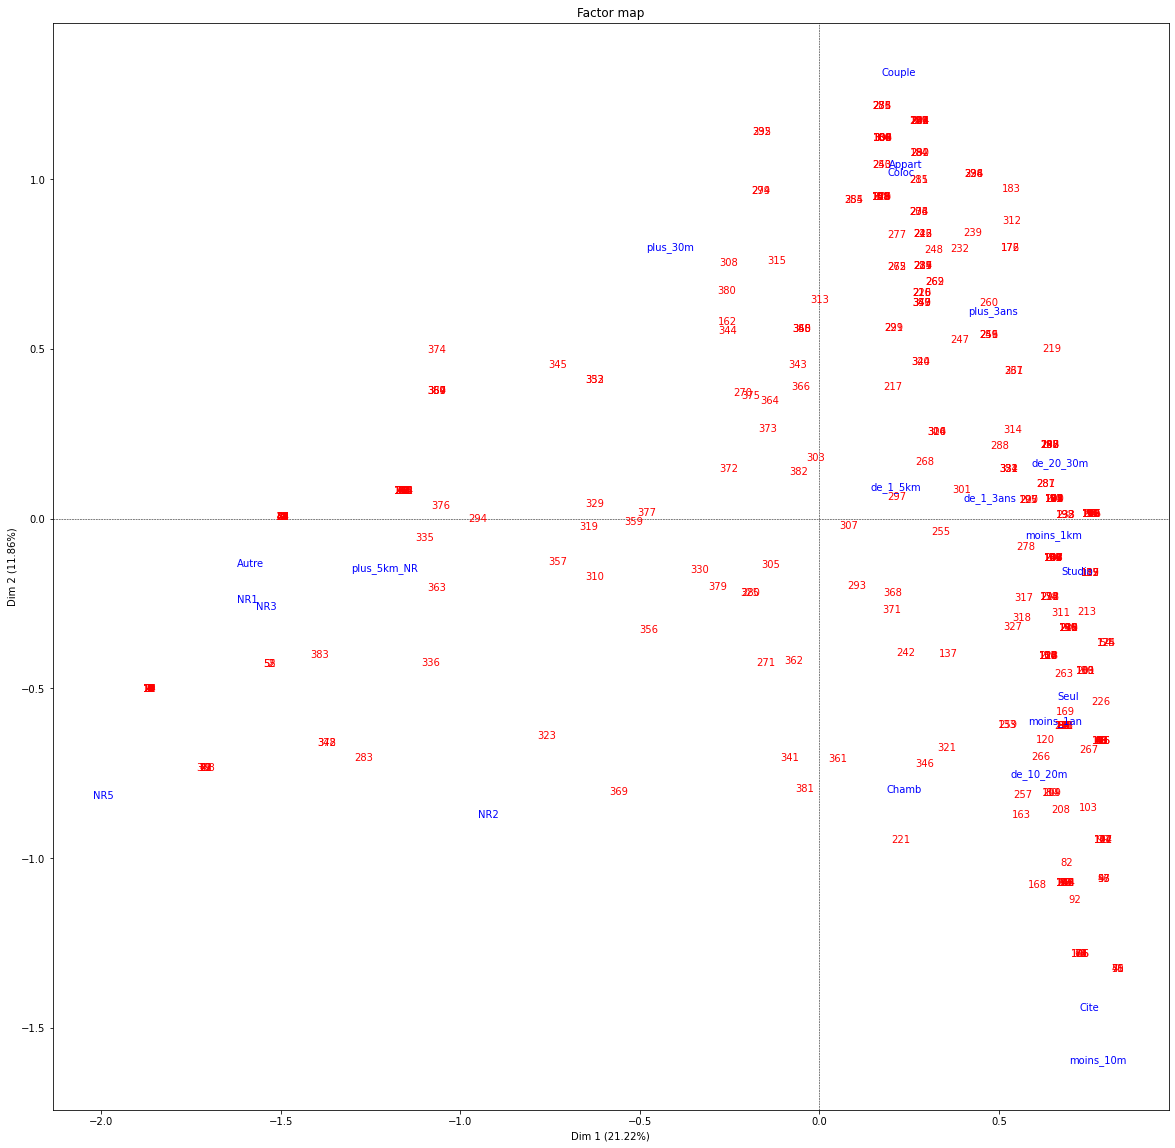

In [36]:
# Mapping simultané des points lignes et colonnes
# Les paramètres de la méthode mapping indiquent que ce sont les axes 1 et 2 qui sont ici représentés
my_mca.mapping(num_x_axis=1, num_y_axis=2,figsize=(20,20))

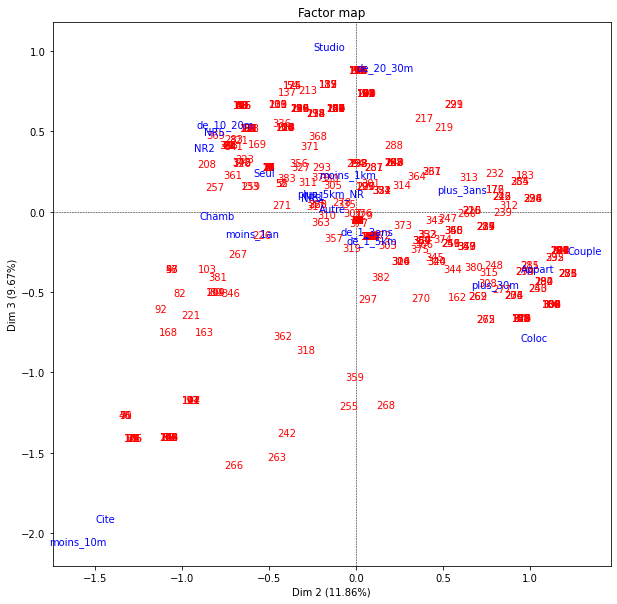

In [26]:
# Mapping simultané des points lignes et colonnes
# Les paramètres de la méthode mapping indiquent que ce sont les axes 1 et 2 qui sont ici représentés
my_mca.mapping(num_x_axis=2, num_y_axis=3,figsize=(10,10))

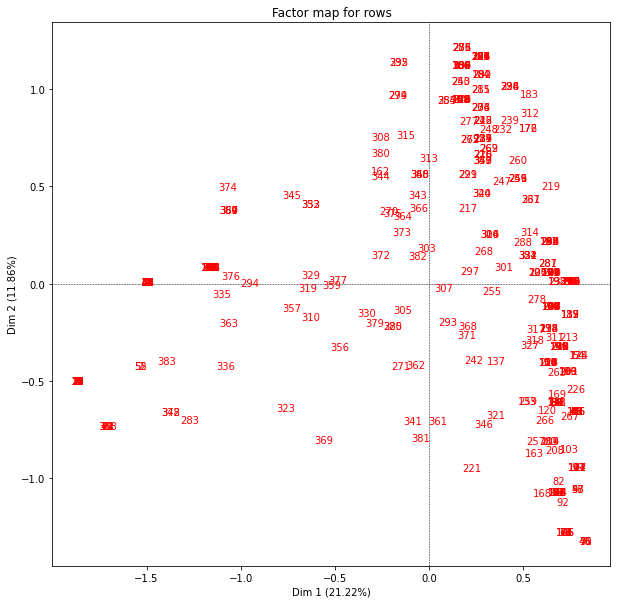

In [27]:
# Mapping des points lignes
my_mca.mapping_row(num_x_axis=1, num_y_axis=2,figsize=(10,10))

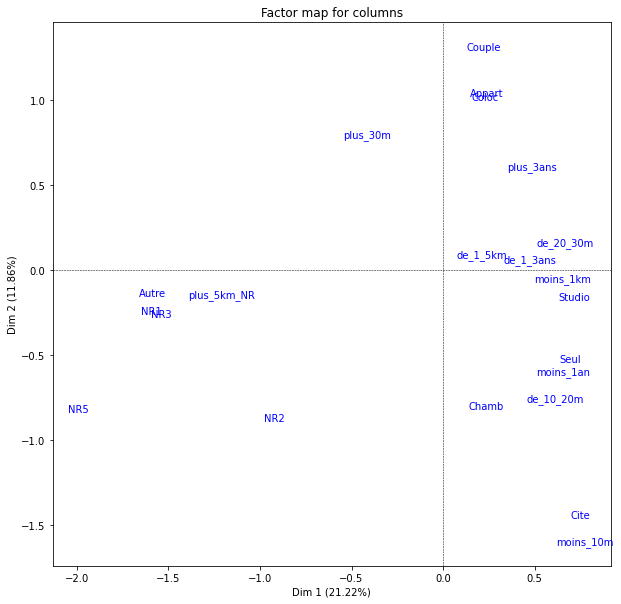

In [28]:
# Mapping des points colonnes
my_mca.mapping_col(num_x_axis=1, num_y_axis=2,figsize=(10,10))

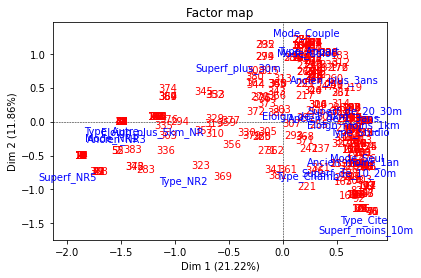

In [30]:
my_mca.mapping(num_x_axis=1, num_y_axis=2, short_labels=False)

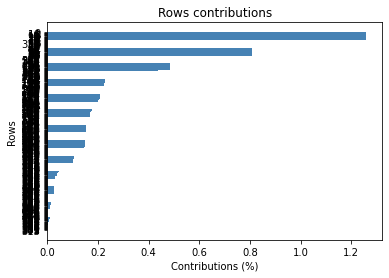

In [38]:
# Classement des points lignes en fonction de leur contribution au 1er axe
# Le paramètre de la méthode plot_row_contrib indique que c'est pour l'axe numéro 1 que les contributions sont ici 
# représentées
my_mca.plot_row_contrib(num_axis=1)

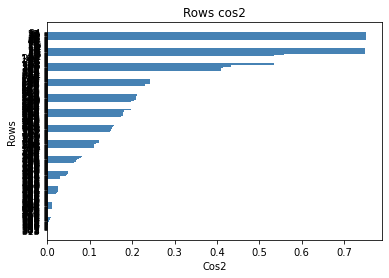

In [32]:
# Classement des points lignes en fonction de leur cos2 sur le 1er axe
my_mca.plot_row_cos2(num_axis=1)

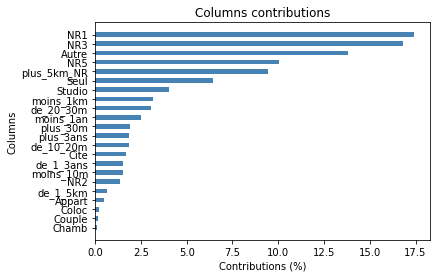

In [33]:
# Classement des points colonnes en fonction de leur contribution au 1er axe
my_mca.plot_col_contrib(num_axis=1)

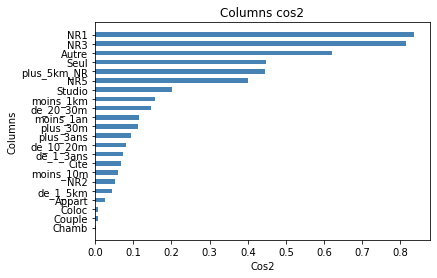

In [34]:
# Classement des points colonnes en fonction de leur cos2 sur le 1er axe
my_mca.plot_col_cos2(num_axis=1)

Pour ces graphiques produits par les méthodes plot_row_contrib, plot_row_cos2, plot_col_contrib, plot_col_cos2, on peut se limiter à visualiser les x valeurs les plus grandes via le paramètre nb_values.

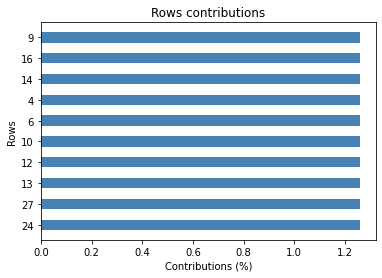

In [35]:
my_mca.plot_row_contrib(num_axis=1, nb_values=10)